# mo≈ºna u≈ºywaƒá tylko tych bibliotek, kt√≥re sƒÖ za≈Çadowane, reszta z palca ma byƒá pisana 

# Projekt Indywidualny 2022/2023
Zadaniem tego projektu jest potwierdzenie posiadania przez Pa≈Ñstwa umiejƒôtno≈õci budowania modelu regresji na przyk≈Çadzie danych zawierajƒÖcych ceny nieruchomo≈õci znajdujƒÖcych siƒô w pliku "domy.csv". W zadaniu nale≈ºy wykorzystaƒá wiedzƒô poznanƒÖ na laboratorium i wyk≈Çadzie w tym metody regularyzacji, metody wyboru i tworzenia nowych zmiennych, okre≈õlenie jako≈õci modelu, metody optymalizacji.

Za projekt mo≈ºna zdobyƒá 50 pkt. Za ka≈ºde zadanie mo≈ºna dostaƒá od 0 do 5 pkt. Ka≈ºde zadanie musi byƒá opisane stosownymi komentarzami i podsumowane wnioskami wynikajƒÖcymi z wykonanych oblicze≈Ñ.

**!!! Do wykonania projektu nie mo≈ºemy korzystaƒá z ≈ºadnych dodatkowych pakiet√≥w ni≈º poni≈ºsze 5 !!!**

Czas na wykonanie projektu - 31.12.2022 r.

jakie matematyczne mo≈ºna           byle optymalizatory by≈Çy w≈Çasnorƒôcznie

In [1]:
# Wyczanie pakiet√≥w podstawowych
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\krukd\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import re

In [3]:
# Wczytanie danych
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
domy

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0       1.00   
1      6414100192  20141209T000000  538000.0       3.0       2.25   
2      5631500400  20150225T000000  180000.0       2.0       1.00   
3      2487200875  20141209T000000  604000.0       4.0       3.00   
4      1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...              ...       ...       ...        ...   
21608  0263000018  20140521T000000  360000.0       3.0       2.50   
21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611  0291310100  20150116T000000  400000.0       3.0       2.50   
21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot floors  waterfront  view  ...  grade  sqft_above  \
0           1180.0      5650      1           0     0  ...      7        1180   
1           2570.0      7242      2           0     0  ...      7        2170   
2            770.0     10000      1           0     0  ...      6         770   
3           1960.0      5000      1           0     0  ...      7        1050   
4           1680.0      8080      1           0     0  ...      8        1680   
...            ...       ...    ...         ...   ...  ...    ...         ...   
21608       1530.0      1131      3           0     0  ...      8        1530   
21609       2310.0      5813      2           0     0  ...      8        2310   
21610       1020.0      1350      2           0     0  ...      7        1020   
21611       1600.0      2388      2           0     0  ...      8        1600   
21612       1020.0      1076      2           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0             1340.0      5650.0  
1             1690.0      7639.0  
2             2720.0      8062.0  
3             1360.0      5000.0  
4             1800.0      7503.0  
...              ...         ...  
21608         1530.0      1509.0  
21609         1830.0      7200.0  
21610         1020.0      2007.0  
21611         1410.0      1287.0  
21612         1020.0      1357.0  

[21613 rows x 21 columns]

### Podzia≈Ç danych zostanie dokonany zale≈ºnie od numeru indeksu

In [4]:
# !!!Jako random_state podaj sw√≥j numer indeksu!!!
numer_indeksu = 324244
ceny = domy['price']
domy.drop('price', axis=1, inplace=True)
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)
cechy = domy.columns.values
cechy 

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

## Zadanie 1
Dokonaj analizy posiadanych zmiennych. Zakresy zmienno≈õci, korelacje, sko≈õno≈õƒá. Dane nieu≈ºyteczne jak np. id mo≈ºna pominƒÖƒá.

In [5]:
domy.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  20141013T000000       3.0       1.00       1180.0      5650   
1  6414100192  20141209T000000       3.0       2.25       2570.0      7242   
2  5631500400  20150225T000000       2.0       1.00        770.0     10000   
3  2487200875  20141209T000000       4.0       3.00       1960.0      5000   
4  1954400510  20150218T000000       3.0       2.00       1680.0      8080   

  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0      1           0     0          3      7        1180              0   
1      2           0     0          3      7        2170            400   
2      1           0     0          3      6         770              0   
3      1           0     0          5      7        1050            910   
4      1           0     0          3      8        1680              0   

   yr_built  yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  
0      1955             0   98178  47.5112 -122.257         1340.0      5650.0  
1      1951          1991   98125  47.7210 -122.319         1690.0      7639.0  
2      1933             0   98028  47.7379 -122.233         2720.0      8062.0  
3      1965             0   98136  47.5208 -122.393         1360.0      5000.0  
4      1987             0   98074  47.6168 -122.045         1800.0      7503.0

In [6]:
domy.describe()

bedrooms     bathrooms   sqft_living      sqft_lot    waterfront  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      0.007542   
std        0.930062      0.770163    918.440897  4.142051e+04      0.086517   
min        0.000000      0.000000    290.000000  5.200000e+02      0.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      0.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      0.000000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      0.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      1.000000   

               view     condition         grade    sqft_above  sqft_basement  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean       0.234303      3.409430      7.656873   1788.390691     291.509045   
std        0.766318      0.650743      1.175459    828.090978     442.575043   
min        0.000000      1.000000      1.000000    290.000000       0.000000   
25%        0.000000      3.000000      7.000000   1190.000000       0.000000   
50%        0.000000      3.000000      7.000000   1560.000000       0.000000   
75%        0.000000      4.000000      8.000000   2210.000000     560.000000   
max        4.000000      5.000000     13.000000   9410.000000    4820.000000   

           yr_built  yr_renovated           lat          long  sqft_living15  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean    1971.005136     84.402258     47.560053   -122.213896    1986.552492   
std       29.373411    401.679240      0.138564      0.140828     685.391304   
min     1900.000000      0.000000     47.155900   -122.519000     399.000000   
25%     1951.000000      0.000000     47.471000   -122.328000    1490.000000   
50%     1975.000000      0.000000     47.571800   -122.230000    1840.000000   
75%     1997.000000      0.000000     47.678000   -122.125000    2360.000000   
max     2015.000000   2015.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   21613.000000  
mean    12768.455652  
std     27304.179631  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10083.000000  
max    871200.000000

In [7]:
domy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  object 
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  float64
 5   sqft_lot       21613 non-null  int32  
 6   floors         21613 non-null  object 
 7   waterfront     21613 non-null  int32  
 8   view           21613 non-null  int32  
 9   condition      21613 non-null  int32  
 10  grade          21613 non-null  int32  
 11  sqft_above     21613 non-null  int32  
 12  sqft_basement  21613 non-null  int32  
 13  yr_built       21613 non-null  int32  
 14  yr_renovated   21613 non-null  int32  
 15  zipcode        21613 non-null  object 
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [8]:
# sns.set(rc={'figure.figsize':(12,9)})
# col_iter = 0
# for col in domy.columns:
#     if col != "id" and col != "date" and col != "zipcode":
#         sns.histplot(domy[col])
#         plt.show()
#     col_iter += 1

eliminuje wszystko poza int/float, poniewa≈º chce wykonaƒá numeryczne modyfikacje

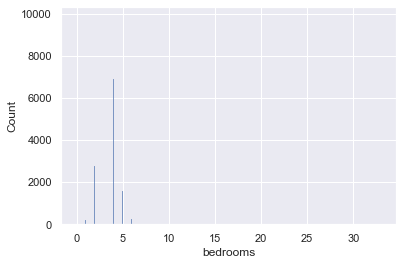

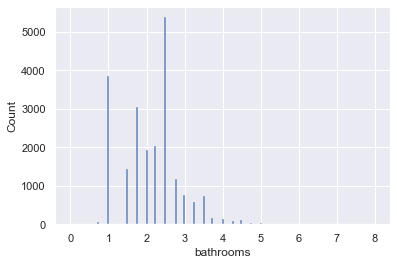

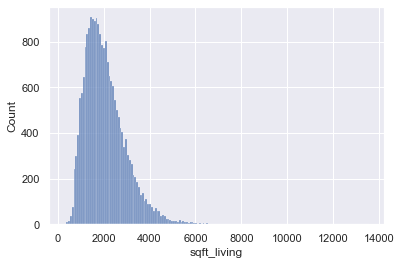

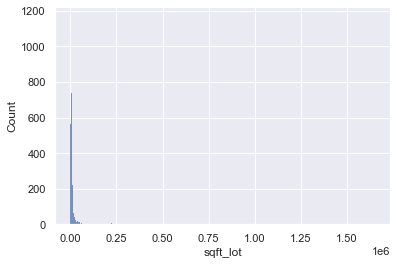

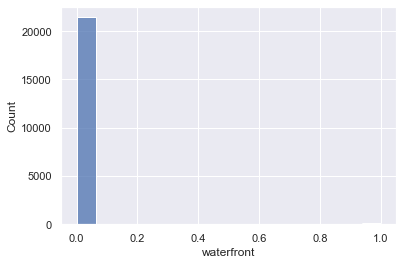

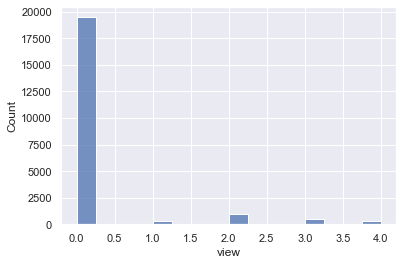

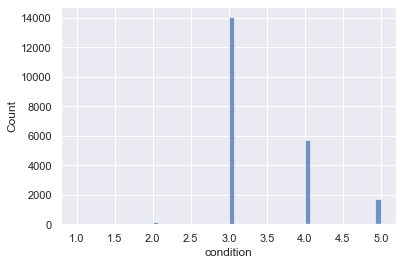

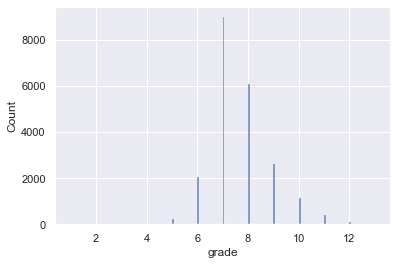

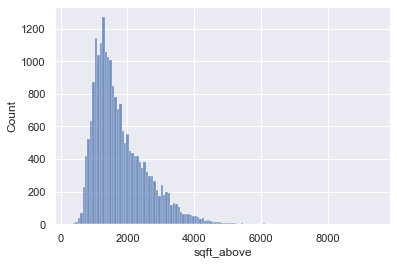

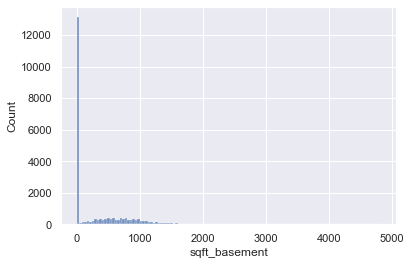

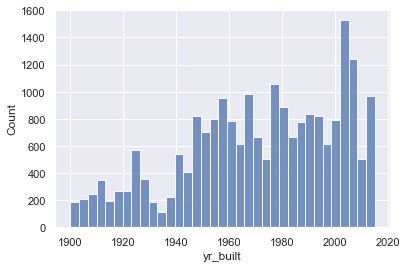

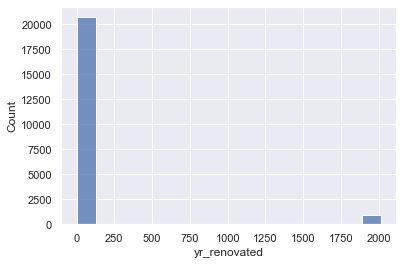

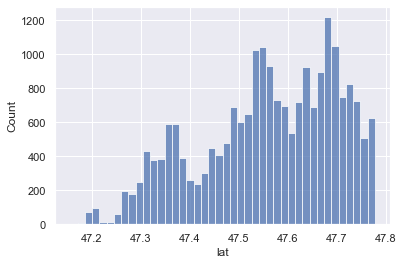

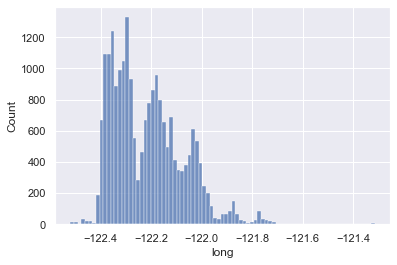

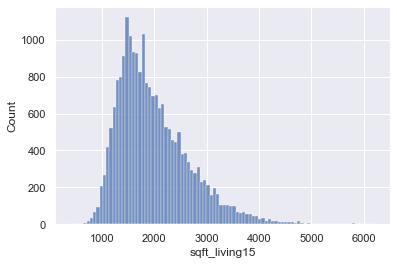

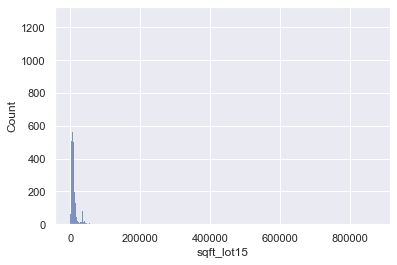

In [9]:
sns.set(rc={'figure.figsize':(12,9)})
col_iter = 0
for col in domy.columns:
    if re.match('^float', str(domy.dtypes[col])) or re.match('^int', str(domy.dtypes[col])):
        sns.histplot(domy[col])
        plt.show()
    col_iter += 1

* sqft_living prawostronny -> daƒá log |
* sqrf_lot te≈º prawostronny? |
	na pewno mo≈ºna lepiej splotowaƒá |
* waterfront 0/1? jak tak, to co≈õ z tym robiƒá? |
* sqft_above (Above Grade Square Feet is the term referring to all living square feet in a home that is above the ground) prawostronny -> daƒá log |
* sqft_basement ma 0, mo≈ºe to jako≈õ podzieliƒá na sqft_basement > 0 i te reszta? |
* to samo z yr_renovated |
* long prawostronny? |
* sqft_living15 prawostronny? czy on siƒô czym≈õ r√≥≈ºni od po prostu sqft_living? |
* to samo z sqft_lot15

In [10]:
#domy['sqft_living_LOG'] = domy.apply(lambda row: domy['sqft_living'], axis=1)

In [27]:
nowe_cech = domy.copy()

In [30]:
domy['sqft_living_LOG'] = np.log(domy['sqft_living'])
try:
    nowe_cech = nowe_cech.drop('sqft_living', axis=1)
except KeyError:
    pass
nowe_cech['sqft_living_LOG'] = domy['sqft_living_LOG']

In [31]:
domy['sqft_lot_LOG'] = np.log(domy['sqft_lot'])
try:
    nowe_cech = nowe_cech.drop('sqft_lot', axis=1)
except KeyError:
    pass
nowe_cech['sqft_lot_LOG'] = domy['sqft_lot_LOG']

In [14]:
# floors to string

In [32]:
domy['sqft_above_LOG'] = np.log(domy['sqft_above'])
try:
    nowe_cech = nowe_cech.drop('sqft_above', axis=1)
except KeyError:
    pass
nowe_cech['sqft_above_LOG'] = domy['sqft_above_LOG']

In [33]:
domy['bed_bath_rooms'] = domy['bedrooms']*domy['bathrooms']
try:
    nowe_cech = nowe_cech.drop('bedrooms', axis=1)
    nowe_cech = nowe_cech.drop('bathrooms', axis=1)
except KeyError:
    pass
nowe_cech['bed_bath_rooms'] = domy['bed_bath_rooms']

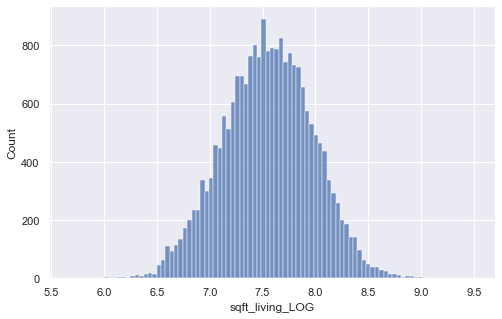

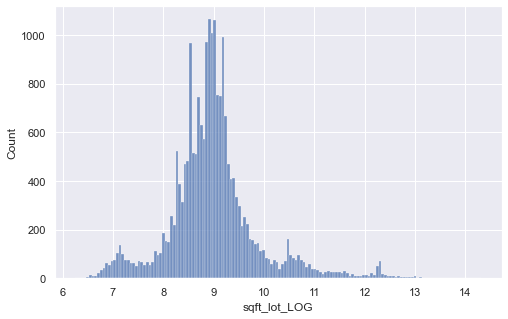

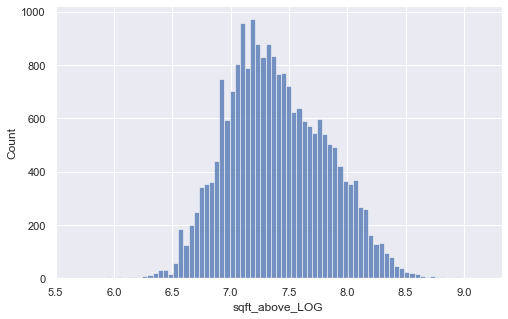

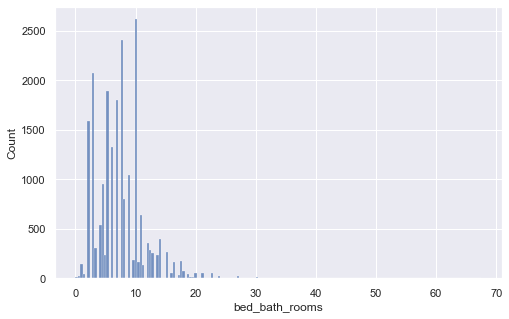

In [17]:
sns.set(rc={'figure.figsize':(8,5)})
for i, col in enumerate(domy.columns):
    if (re.match('^float', str(domy.dtypes[col])) or re.match('^int', str(domy.dtypes[col]))) and i >= col_iter:
        sns.histplot(domy[col])
        plt.show()

* sqft_lot wychodzi NIE unimodalnie
* sqft_living üëç
* sqft_above üëç
* dodanie interakcji pomiedzy bedrooms, bathrooms - przez pomno≈ºenie tych warto≈õci

<AxesSubplot:>

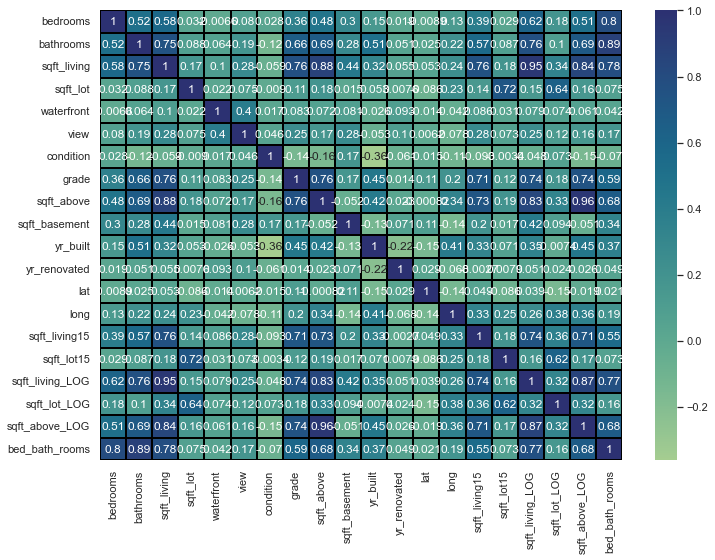

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(domy.corr(),annot = domy.corr(), cmap="crest", linewidths=2, linecolor='black')

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(domy.corr(),annot = domy.corr(), cmap="crest", linewidths=2, linecolor='black')

# co z "id", "date", "zipcode"?

* waterfront 0/1? jak tak, to co≈õ z tym robiƒá? |
* sqft_basement ma 0, mo≈ºe to jako≈õ podzieliƒá na sqft_basement > 0 i te reszta? |
* to samo z yr_renovated |
* long prawostronny? |
* sqft_living15 prawostronny? czy on siƒô czym≈õ r√≥≈ºni od po prostu sqft_living? |
* to samo z sqft_lot15

In [19]:
domy.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_living_LOG', 'sqft_lot_LOG',
       'sqft_above_LOG', 'bed_bath_rooms'],
      dtype='object')

In [20]:
# Funkcja szukajƒÖca wsp√≥≈Çczynnik√≥w modelu
def model_train(X_train, Y_train):
    # Wylicza wsp√≥≈Çczynniki modelu wykorzystujƒÖc pseudoodwrotno≈õƒá
    pinw = np.linalg.pinv(X_train)
    model = np.dot(pinw, Y_train)
    return(model)

In [21]:
def predict_output(data, w):
    return np.dot(data, w)

In [22]:
def policz_SSE(model, data, outcome):
    # Wylicz przewidywanƒÖ warto≈õƒá
    pred = predict_output(data, model)
    # Policz b≈ÇƒÖd bezwzglƒôny
    error = outcome - pred
    # Podnie≈õ b≈Çƒôdy do kwadratu i zsumuj je
    SSE = sum(np.square(error))
    return(SSE)    

## Zadanie 2
Zaproponuj 5 nowych cech bƒôdƒÖcych wynikiem przeprowadzonych w ramach Zadaniu 1 analiz lub do≈õwiadcze≈Ñ.

## Zadanie 3
Dokonaj wizualiazji nowych cech i okre≈õl ich korelacjƒô.

## Zadanie 4

Wyznacz liniowƒÖ zale≈ºno≈õƒá miƒôdzy 3 najbardziej skorelowanymi ze zmiennƒÖ opisywanƒÖ zmiennymi opisujƒÖcymi (wszystkie podane cechy + 5 nowo utworzonych). Do wyznaczenia liniowej zale≈ºno≈õci miƒôdzy cechami, a zmiennƒÖ opisywanƒÖ wykorzystaj pseudoinwersjƒô.

#### OPISYWANƒÑ I OPISANYMI. pseudoinwersje mo≈ºna funkcjƒÖ numpy-owƒÖ

## Zadanie 5
Napisz metodƒô regresji krokowej w ty≈Ç i za jej pomocƒÖ wybierz 5 najbardziej warto≈õciowych cech.

## Zadanie 6
Dokonaj normalizacji cech (wszystkie podane + 5 zaproponowanych w Zadaniu 1) i przy pomocy metody Lasso lub LARS (metody majƒÖ zostaƒá samodzielnie zaimplementowane) wybierz 5 najbardziej warto≈õciowych cech.

**!!! Przy przekszta≈Çceniach unikaj korzystania z informacji zawartej w zbiorze walidacyjnym i testowym !!!**

#### normalizacja ≈ºeby by≈Ço ≈Çatwiej. implementowane by≈Ço lasso i mo≈ºna jej u≈ºyƒá, mo≈ºna jak siƒô chce LARS samemu zaimplementowaƒá. mamy 3 zbiory dlatego na uczenia

## Zadanie 7
Zaimplementuj metodƒô spadku gradient√≥w dla regularyzacji grzebietowej. Zabezpiecz siƒô przed zbyt du≈ºym wsp√≥≈Çczynnikiem uczenia, badajƒÖc zbie≈ºno≈õƒá w ka≈ºdym kroku i w razie potrzeby zmniejszajƒÖc wsp√≥≈Çczynnik uczenia $\sqrt{2}$ razy.

#### by≈Ço na wyk≈Çadzie. wystarczy wstawiƒá wsp√≥≈Çczynnik i powinno dzia≈Çaƒá

## Zadanie 8
Dla 5 wybranych w Zadaniu 5 cech dokonaj doboru wsp√≥≈Çczynnika regularyzacji dla metody grzbietowej. 

*Skorzystaj z w≈Çasnej implementacji regresji z Zadania 7. Zacznij od wysokiego wsp√≥≈Çczynnika uczenia.*

## Zadanie 9
Wytrenuj 5 modeli:
1. WykorzystujƒÖcy wszystkie cechy dane w zbiorze.
2. WykorzystujƒÖcy wszystkie cechy dane w zbiorze + 5 zaproponowanych.
3. WykorzystujƒÖcy 5 cech wybranych regresjƒÖ krokowƒÖ w ty≈Ç.
4. WykorzystujƒÖce tylko cechy wybrane dziƒôki metodzie Lasso.
5. WykorzystujƒÖce cechy wybrane w metodzie Lasso i poddane regularyzacji grzbietowej dla wybranego wsp√≥≈Çczynnika regularyzacji.

#### trenujemy r√≥≈ºne modele ka≈ºdy model 1 pkt

## Zadanie 10
Dokonaj oceny i por√≥wnania modeli z Zadania 9. Wybierz najlepszy model.

#### por√≥wnanie na zbiorze testowym. je≈ºeli siƒô uprƒô mogƒô ca≈Çy uczƒÖcy. !!!!!w reszcie robiƒá walidacjƒô krzy≈ºowƒÖ